In [1]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import requests #Библиотека для запроса
import pandas as pd
# https://youtu.be/CznaOZaGTz0
a = 1 #Переменная для перехода по страницам
Custom = list()
Number_of_owners = list()
Year = list()
Price = list()
Region = list()
Mileage = list()
Brand = list()
Model = list()
Power = list()
Type = list()
Engine_type = list()
korobka = list()
info = {'Custom': Custom, 'Number_of_owners': Number_of_owners,'Year': Year, 
        'Price': Price, 'Region' :Region, 'Mileage': Mileage, 
        'Brand': Brand, 'Model': Model, 'Power': Power, 'Type': Type, 
        'Engine_type': Engine_type, "Transmission": korobka}


while a <= 30: #Всего 1809 страниц на сайте
    URL = 'https://auto.ru/-/ajax/desktop/listing/' #URL на который будет отправлен запрос

    #Параметры запроса
    PARAMS = {
         'section': "all",
         'category': "cars",
         'sort': "fresh_relevance_1-desc",
         'page': a
        }
    #Заголовки страницы
    HEADERS = {
        'Accept': '*/*',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'ru-RU,ru;q=0.8,en-US;q=0.5,en;q=0.3',
        'Connection': 'keep-alive',
        'Content-Length': '137',
        'content-type': 'application/json',
        'Cookie': '_csrf_token=1c0ed592ec162073ac34d79ce511f0e50d195f763abd8c24; autoru_sid=a%3Ag5e3b198b299o5jhpv6nlk0ro4daqbpf.fa3630dbc880ea80147c661111fb3270%7C1580931467355.604800.8HnYnADZ6dSuzP1gctE0Fw.cd59AHgDSjoJxSYHCHfDUoj-f2orbR5pKj6U0ddu1G4; autoruuid=g5e3b198b299o5jhpv6nlk0ro4daqbpf.fa3630dbc880ea80147c661111fb3270; suid=48a075680eac323f3f9ad5304157467a.bc50c5bde34519f174ccdba0bd791787; from_lifetime=1580933172327; from=yandex; X-Vertis-DC=myt; crookie=bp+bI7U7P7sm6q0mpUwAgWZrbzx3jePMKp8OPHqMwu9FdPseXCTs3bUqyAjp1fRRTDJ9Z5RZEdQLKToDLIpc7dWxb90=; cmtchd=MTU4MDkzMTQ3MjU0NQ==; yandexuid=1758388111580931457; bltsr=1; navigation_promo_seen-recalls=true',
        'Host': 'auto.ru',
        'origin': 'https://auto.ru',
        'Referer': 'https://auto.ru/moskovskaya_oblast/cars/used/',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0',
        'x-client-app-version': '202002.03.092255',
        'x-client-date': '1580933207763',
        'x-csrf-token': '1c0ed592ec162073ac34d79ce511f0e50d195f763abd8c24',
        'x-page-request-id': '60142cd4f0c0edf51f96fd0134c6f02a',
        'x-requested-with': 'fetch'
    }

    response = requests.post(URL, json=PARAMS, headers=HEADERS)
    data = response.json()['offers'] #Переменная data хранит полученные объявления

    i = 0 
    while i <= len(data) - 1:

        #Растаможен ли автомобиль (возвращает True или False)
        Custom.append(int(bool(data[i]['documents']['custom_cleared'])))

        #Колличество владельцев автомобиля
        Number_of_owners.append(int(data[i]['documents']['owners_number']))

        #Год выпуска автомобиля
        Year.append(int(data[i]['documents']['year']))

        #Цена в рублях
        Price.append(float(data[i]['price_info']['RUR']))

        #Тип двигателя
        Engine_type.append(data[i]['vehicle_info']['tech_param']['engine_type'])

        #Коробка передач
        korobka.append(data[i]['vehicle_info']['tech_param']['transmission'])

        #Регион, в котором находится автомобиль
        Region.append(str(data[i]['seller']['location']['region_info']['name']))
        
        #Пробег автомобиля
        Mileage.append(float(data[i]['state']['mileage']))

        #Объём двигателя пока не смог вытащить, но позже думаю можно

        #Лошадиные силы
        Power.append(float(data[i]['vehicle_info']['tech_param']['power']))

        #Название автомобиля
        Type.append(str(data[i]['vehicle_info']['configuration']['human_name']))

        #Марка автомобиля
        Brand.append(str(data[i]['vehicle_info']['mark_info']['name']))

        #Модель автомобиля
        Model.append(str(data[i]['vehicle_info']['model_info']['name']))

        i += 1 #Увеличиваем переменную перехода по объявлениям на 1
    a += 1 #Увеличиваем переменную страницы сайта на 1

df = pd.DataFrame(info)
df

,Custom,Number_of_owners,Year,Price,Region,Mileage,Brand,Model,Power,Type,Engine_type,Transmission
0,1,3,2003,290000.0,Санкт-Петербург,203000.0,Volkswagen,Polo,64.0,Хэтчбек 5 дв.,DIESEL,MECHANICAL
1,1,2,2017,4100000.0,Оренбург,87000.0,Volkswagen,Multivan,180.0,Минивэн,DIESEL,ROBOT
2,1,2,2007,140000.0,Санкт-Петербург,181000.0,Daewoo,Nexia,90.0,Седан,GASOLINE,MECHANICAL
3,1,1,2020,9800000.0,Брянск,44000.0,Mercedes-Benz,GLE Coupe,272.0,Внедорожник 5 дв.,DIESEL,AUTOMATIC
4,1,2,2017,940000.0,Ижевск,119000.0,LADA (ВАЗ),Vesta,122.0,Универсал 5 дв. SW Cross,GASOLINE,ROBOT
...,...,...,...,...,...,...,...,...,...,...,...,...
1105,1,1,2018,2090000.0,Пенза,149000.0,Hyundai,Santa Fe,171.0,Внедорожник 5 дв.,GASOLINE,AUTOMATIC
1106,1,4,2011,1030000.0,Волгоград,118000.0,Hyundai,Avante,140.0,Седан,GASOLINE,MECHANICAL
1107,1,2,2011,590000.0,Москва,240000.0,Hyundai,Solaris,123.0,Седан,GASOLINE,AUTOMATIC
1108,1,2,2021,1810000.0,Ставрополь,21000.0,Hyundai,Solaris,123.0,Седан,GASOLINE,AUTOMATIC


In [45]:
df.isna().sum()

Custom              0
Number_of_owners    0
Year                0
Price               0
Region              0
Mileage             0
Brand               0
Model               0
Power               0
Type                0
Engine_type         0
Transmission        0
dtype: int64

<Axes: title={'center': 'Какую марку продают и как часто (штуки)'}>

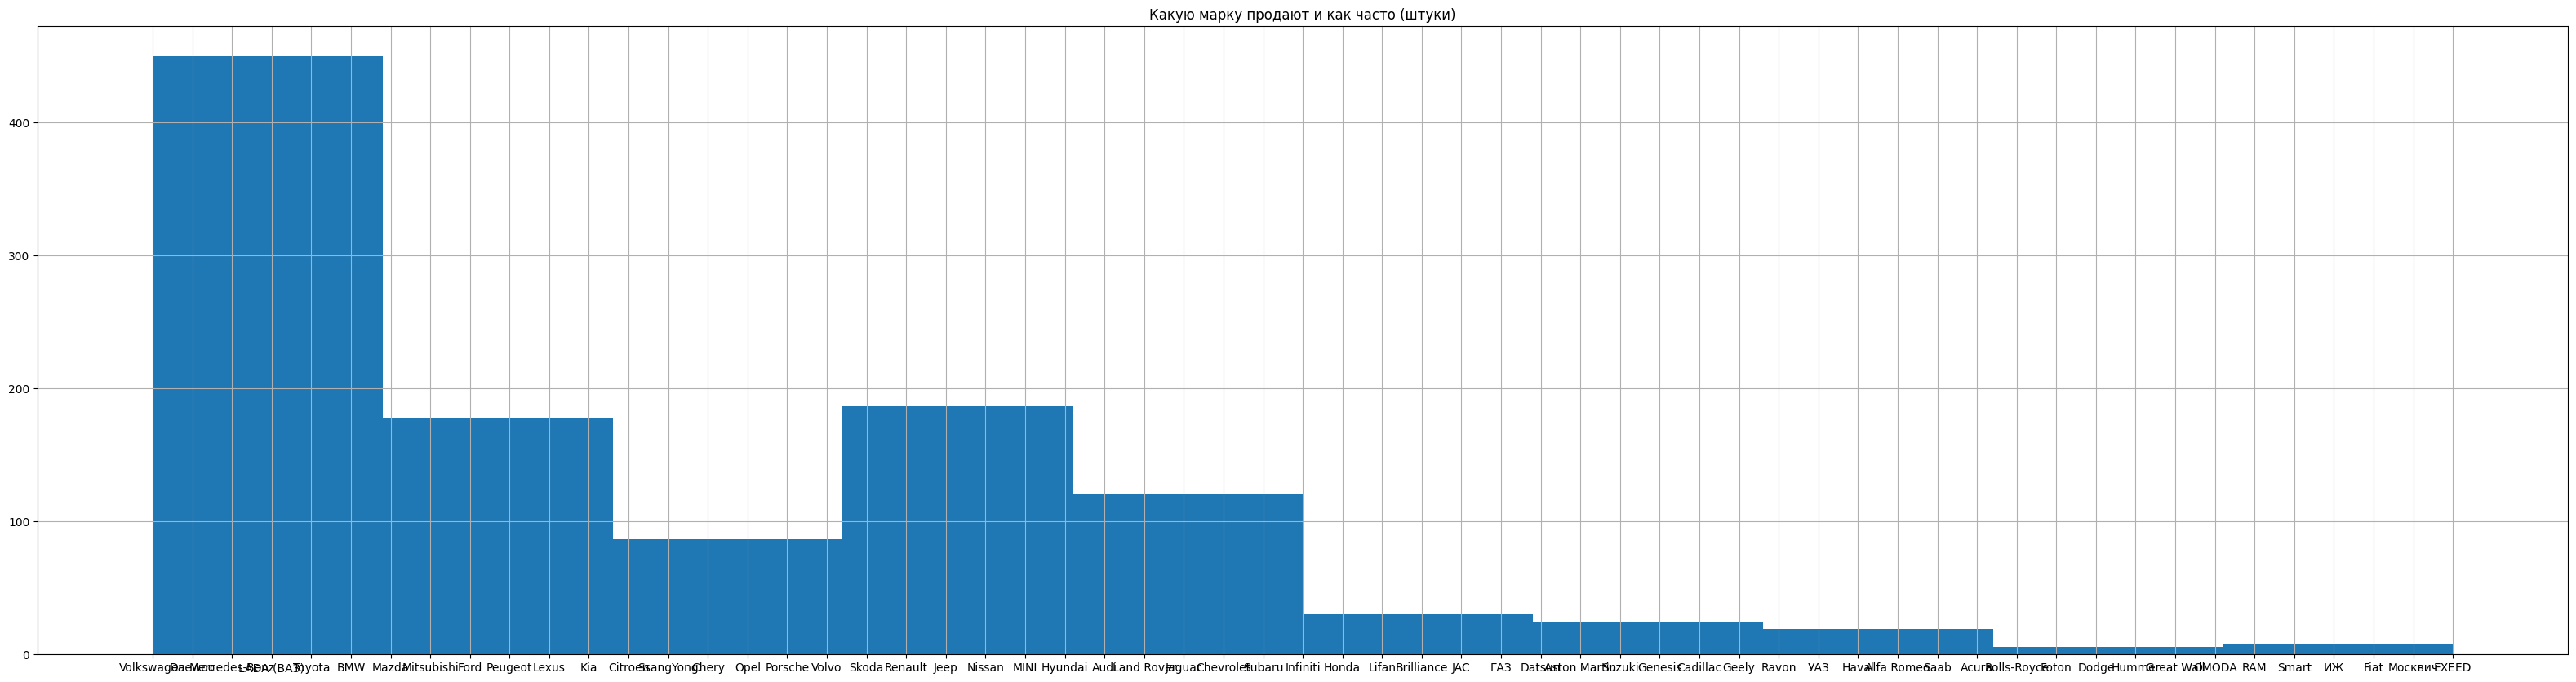

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Какую марку продают и как часто (штуки)')
df.Brand.hist(figsize=(40, 10))

<Axes: title={'center': 'Какой год выпуска автомобиля продают и как часто (штуки)'}>

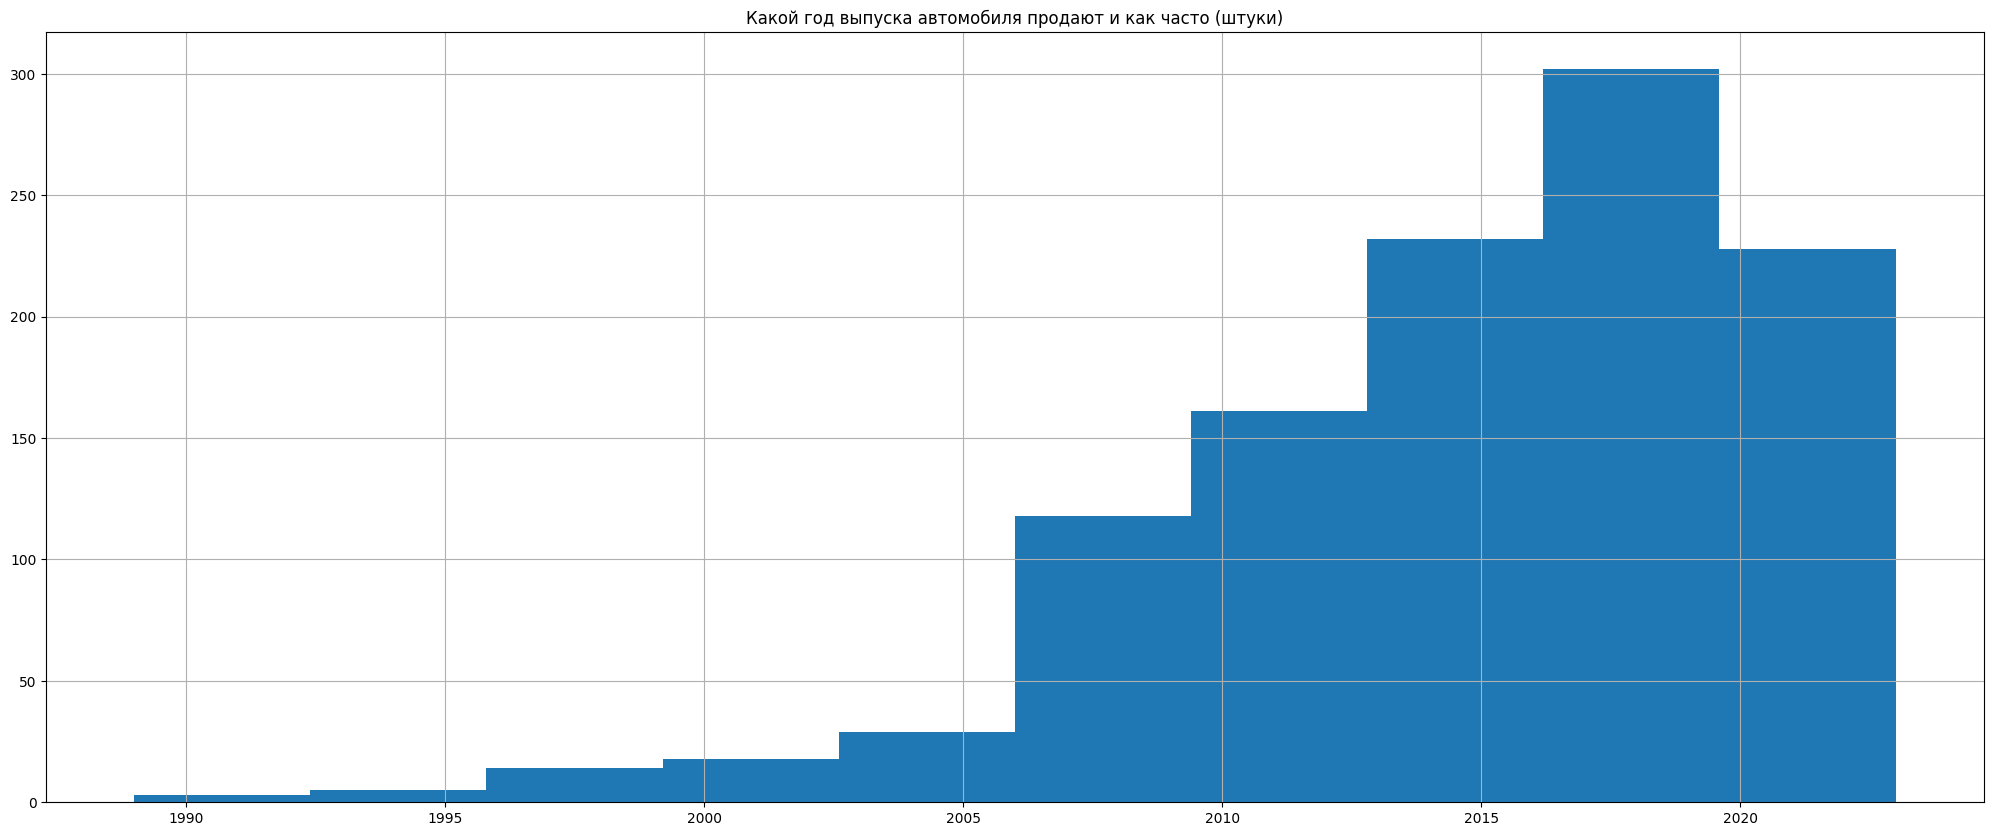

In [47]:
plt.title('Какой год выпуска автомобиля продают и как часто (штуки)')
df.Year.hist(figsize=(25, 10))

<Axes: title={'center': 'Какого типа продают автомобили и как часто (штуки)'}>

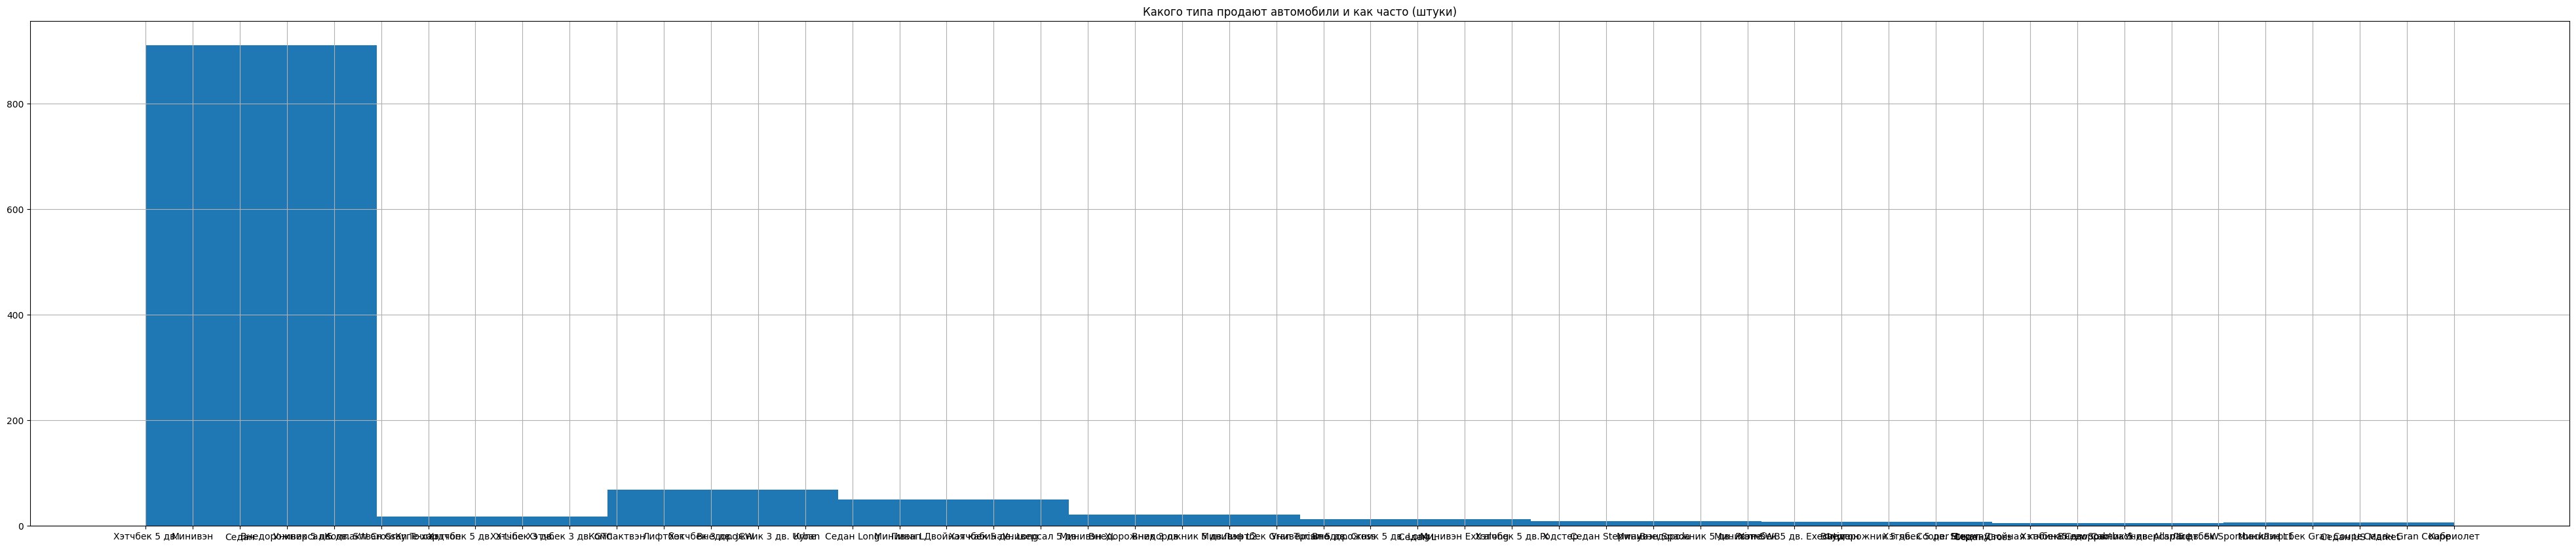

In [71]:
plt.title('Какого типа продают автомобили и как часто (штуки)')
df.Type.hist(figsize=(50, 10))

<Axes: title={'center': 'Автомобили какой мощности продают и как часто (штуки)'}>

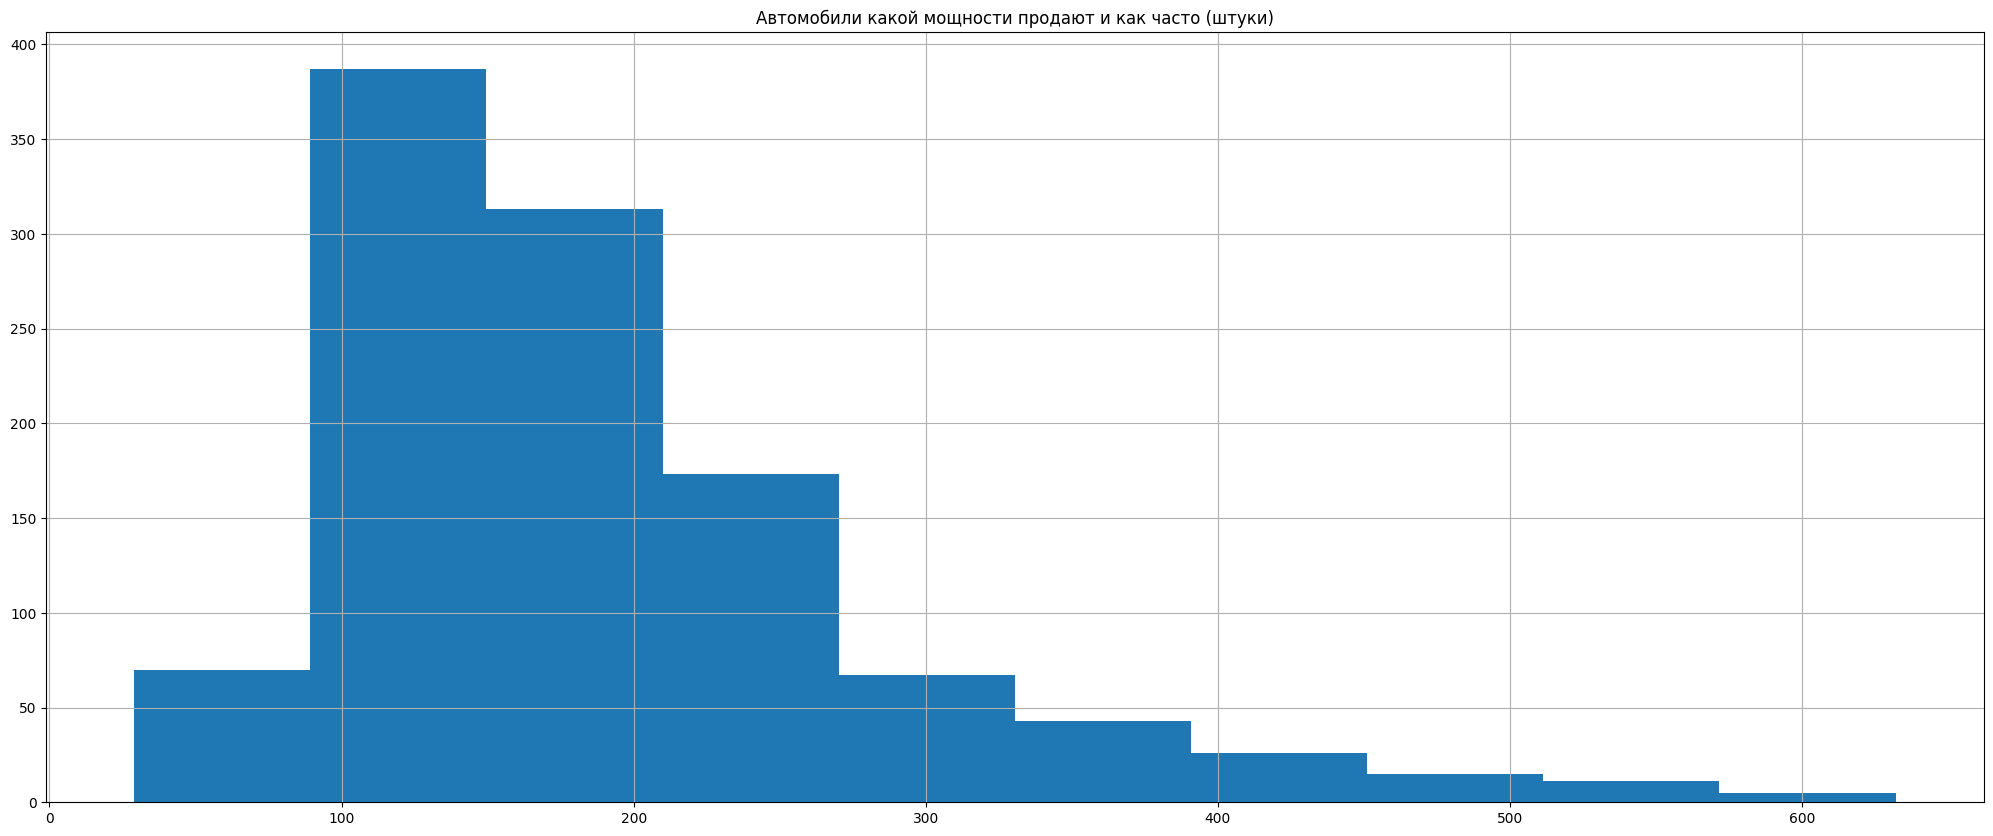

In [50]:
plt.title('Автомобили какой мощности продают и как часто (штуки)')
df.Power.hist(figsize=(25, 10))

<Axes: title={'center': 'Как распределены цены на автомобили'}>

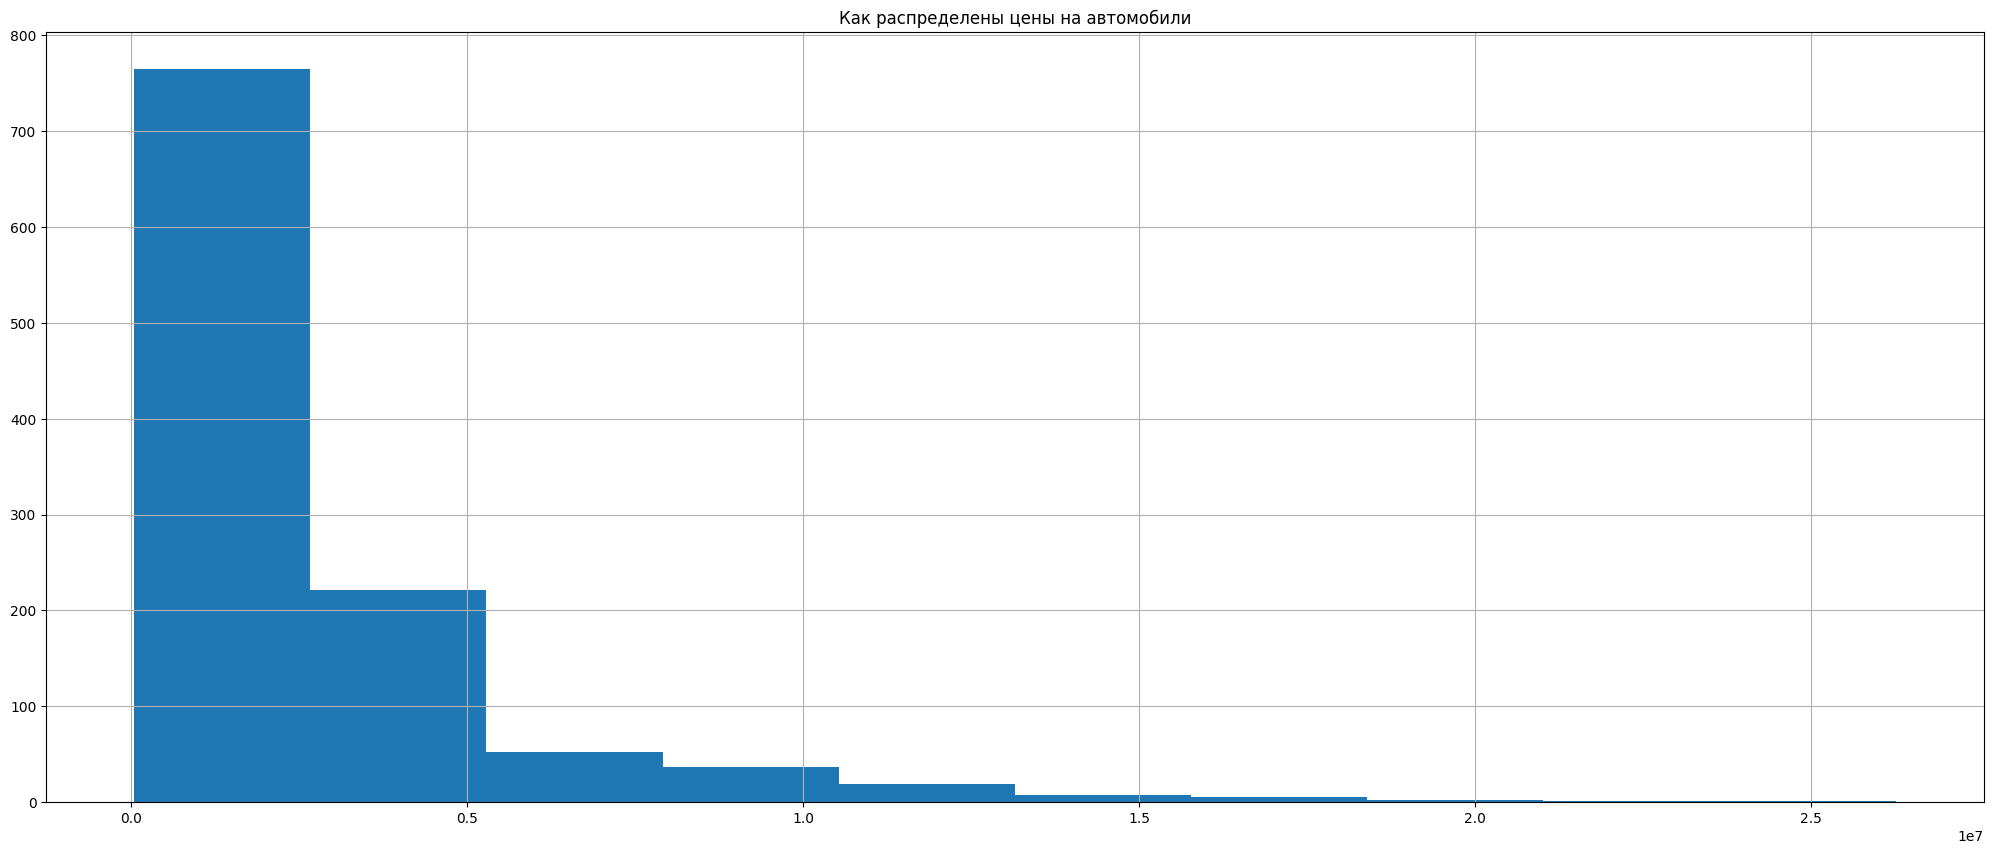

In [51]:
plt.title('Как распределены цены на автомобили')
df.Price.hist(figsize=(25, 10))

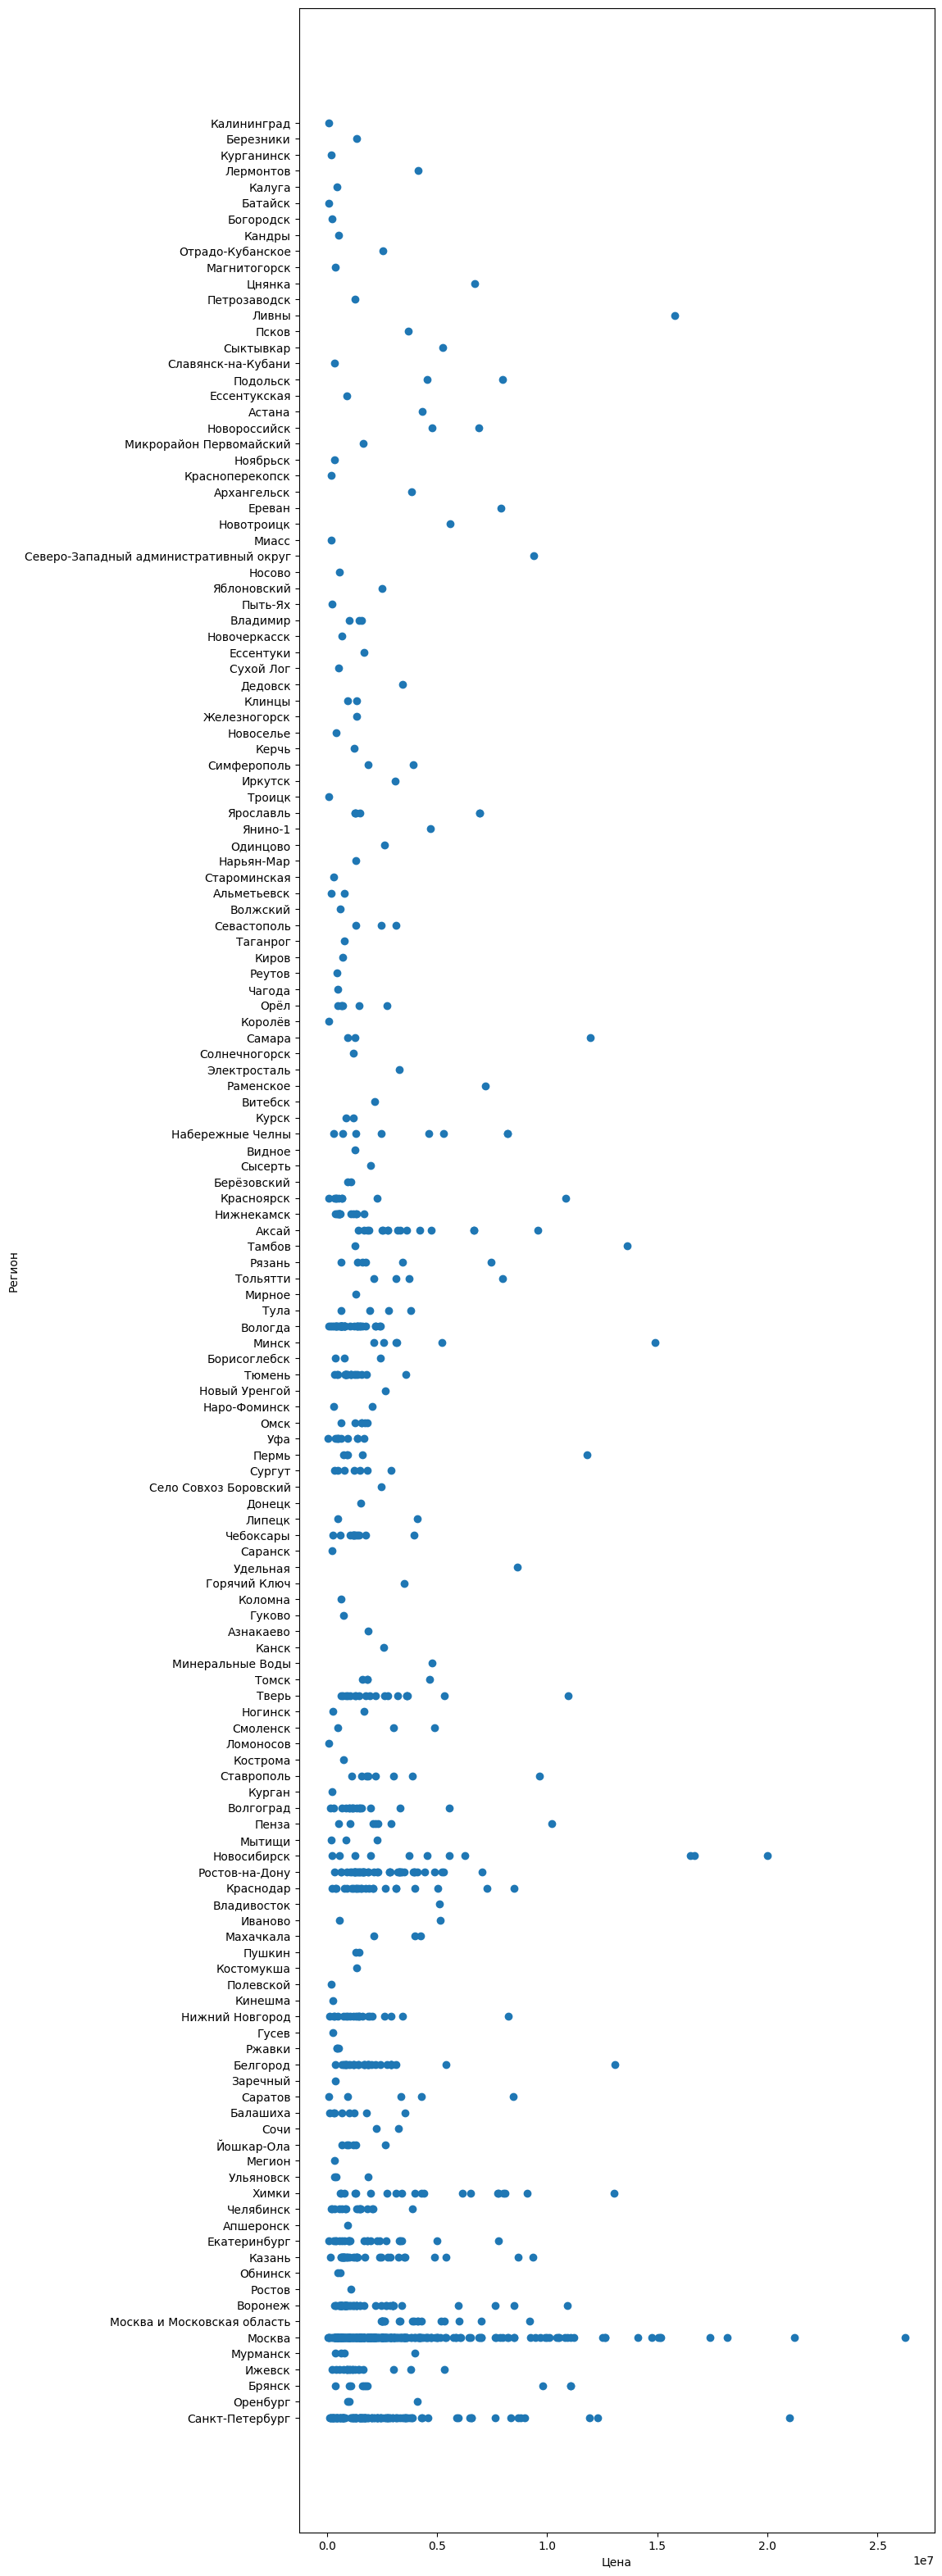

In [65]:
fig, ax = plt.subplots(figsize=(10,40))
ax.scatter(x = df.Price, y = df.Region)
plt.xlabel("Цена")
plt.ylabel("Регион")
plt.show()

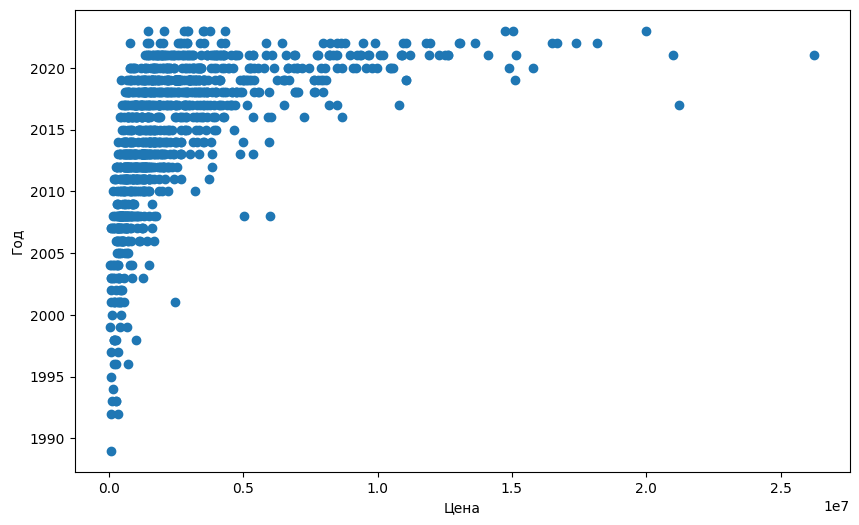

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = df.Price, y = df.Year)
plt.xlabel("Цена")
plt.ylabel("Год")
plt.show()

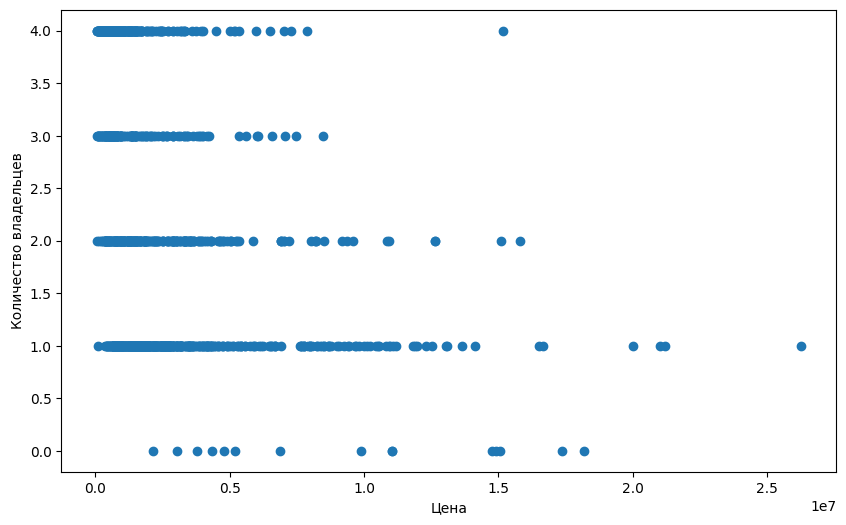

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = df.Price, y = df.Number_of_owners)
plt.xlabel("Цена")
plt.ylabel("Количество владельцев")
plt.show()

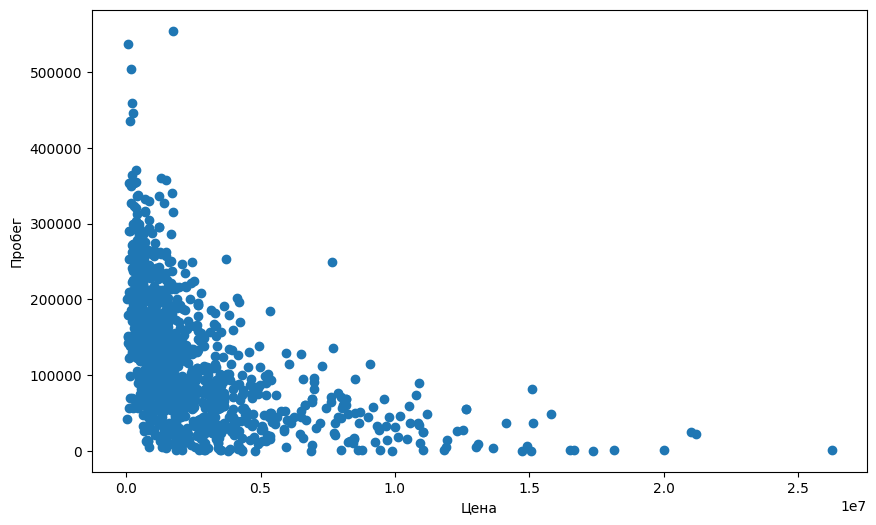

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = df.Price, y = df.Mileage)
plt.xlabel("Цена")
plt.ylabel("Пробег")
plt.show()

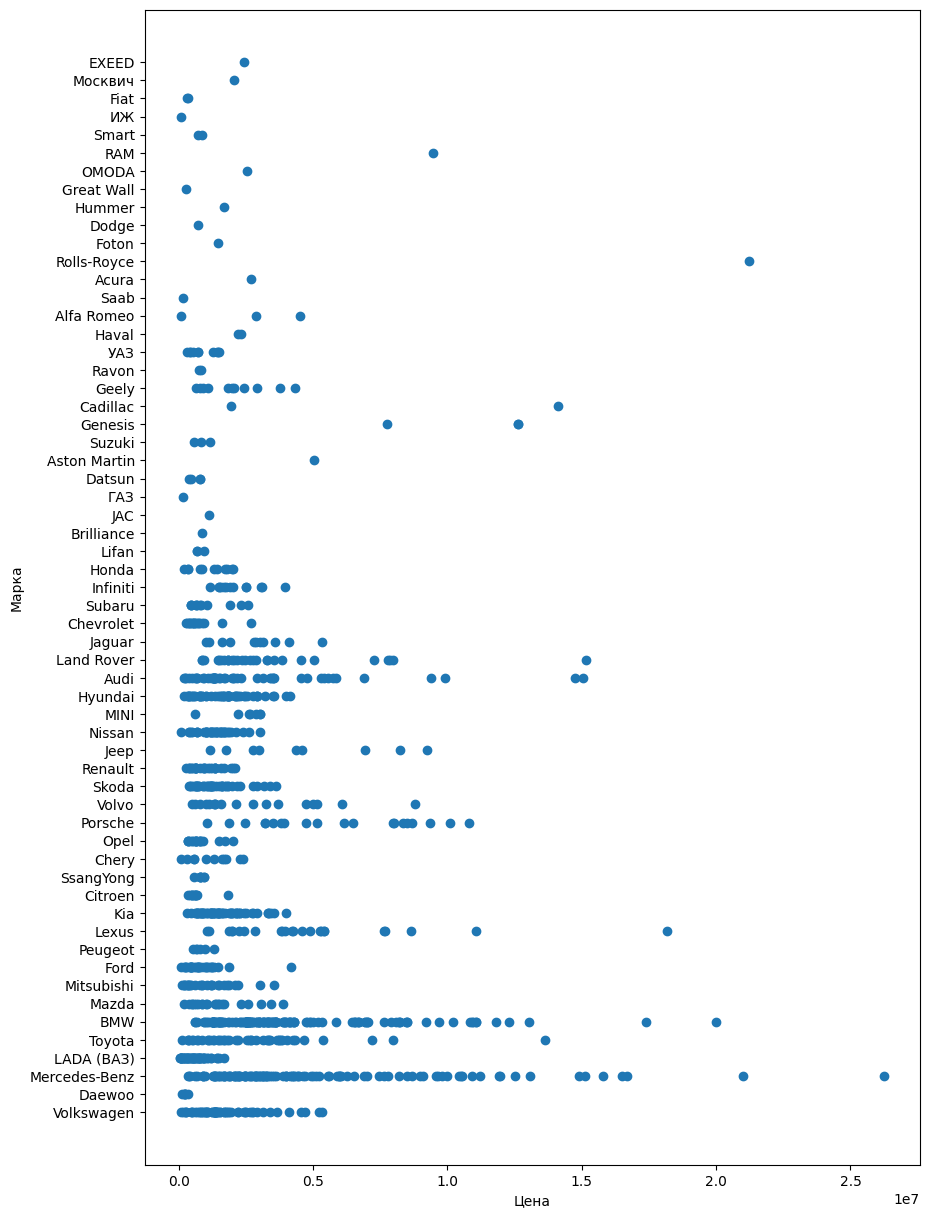

In [60]:
fig, ax = plt.subplots(figsize=(10,15))
ax.scatter(x = df.Price, y = df.Brand)
plt.xlabel("Цена")
plt.ylabel("Марка")
plt.show()

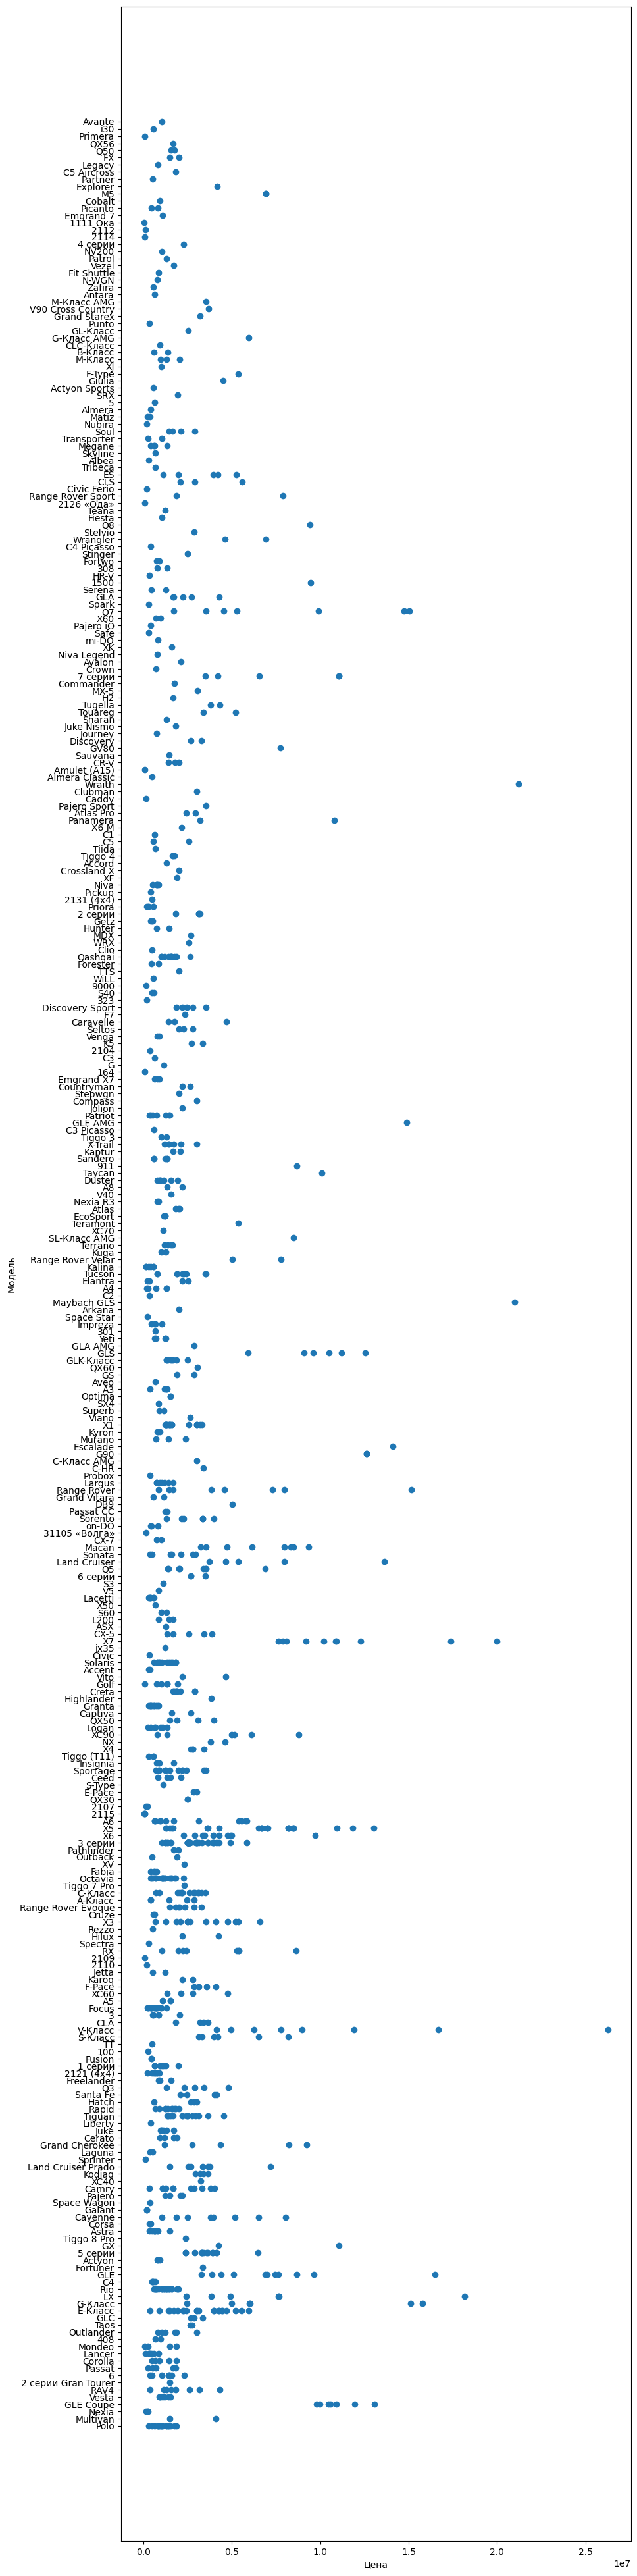

In [74]:
fig, ax = plt.subplots(figsize=(10,50))
ax.scatter(x = df.Price, y = df.Model)
plt.xlabel("Цена")
plt.ylabel("Модель")
plt.show() 

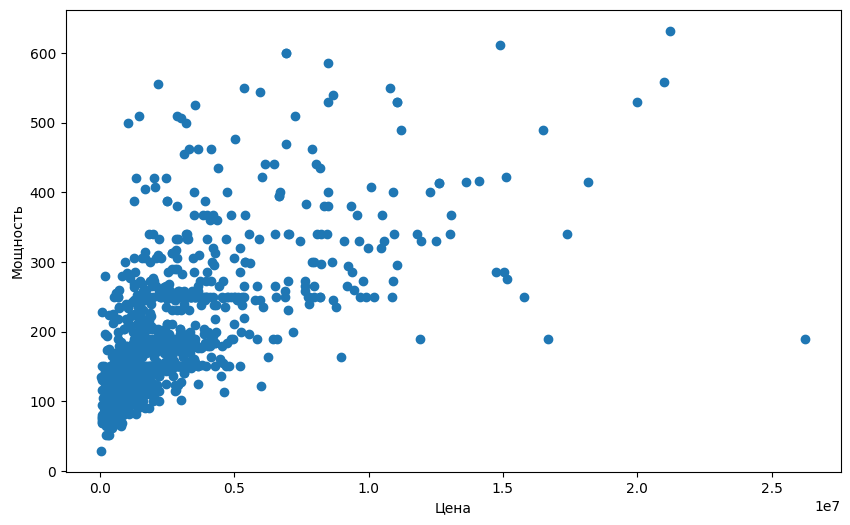

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = df.Price, y = df.Power)
plt.xlabel("Цена")
plt.ylabel("Мощность")
plt.show() 

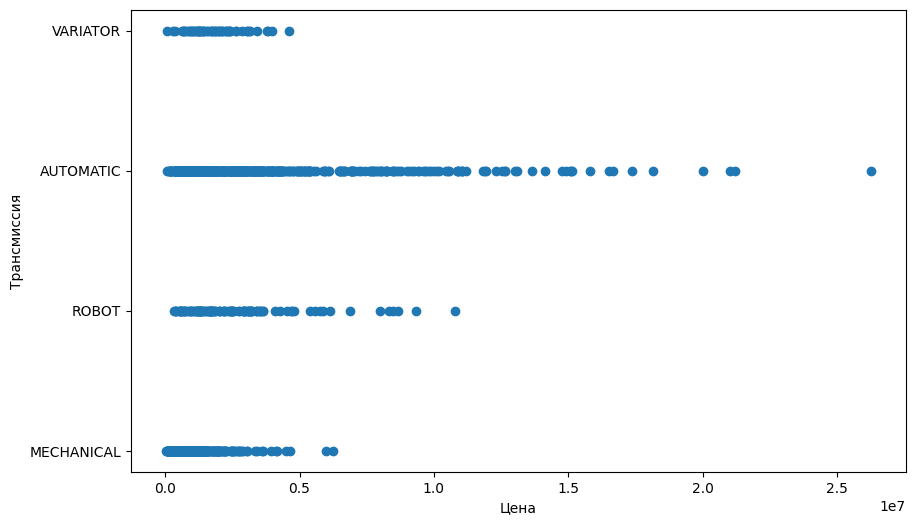

In [75]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = df.Price, y = df.Transmission)
plt.xlabel("Цена")
plt.ylabel("Трансмиссия")
plt.show()

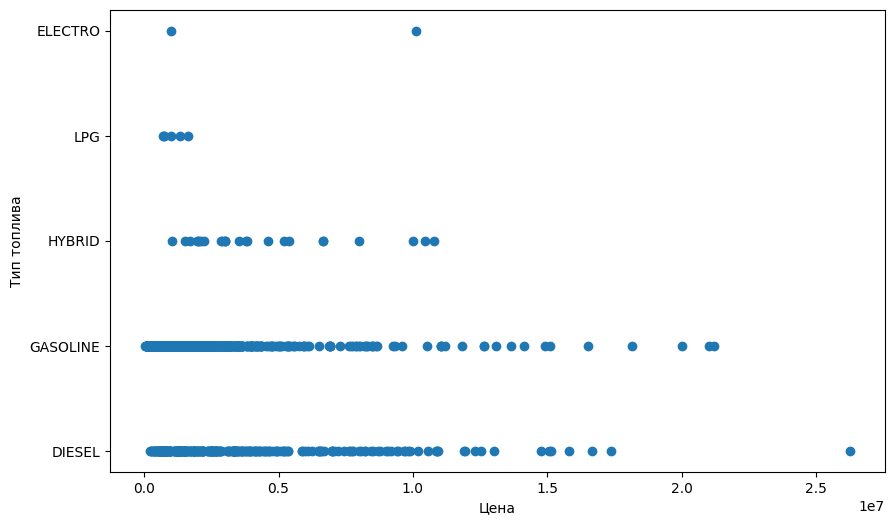

In [76]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = df.Price, y = df.Engine_type)
plt.xlabel("Цена")
plt.ylabel("Тип топлива")
plt.show()

Гипотезы, которые мы будем проверять: 

Чем новее модель автомобиля, тем выше цена на него.

Цена на автомобиль зависит от его пробега и состояния.

Автомобили брендов, которые считаются более надежными и престижными, имеют более высокую цену на рынке.

Цена на автомобиль зависит от того, где он сейчас находится (регион продажи).

Автомобили, которые имеют большую мощность, имеют более высокую цену на рынке.

Автомобили, которые ранее были в авариях или нуждаются в ремонте, продаются по более низкой цене на рынке. 

Мат ожидание цены при условии что владельцев больше трех равно мат ожиданию цены при условии когда владельцев больше двух

Мы будем пользоваться следующими методами машинного обучения: Регрессия (сatboost), Анализ выбросов